In [ ]:
#visualização de RMSE no jupyter
library(ggplot2)
mal=as.data.frame(read.table("grouped_mal.txt"))
kal=as.data.frame(read.table("grouped_kal.txt"))
sti=as.data.frame(read.table("grouped_sti.txt"))
spl=as.data.frame(read.table("grouped_spl.txt"))



names(mal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(spl)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

#Tirando a média 
tamanhoGap= seq(1,100,1) 
mediaSpl=c()
mediaKal=c()
mediaMal=c()
mediaSti=c()

sdSpl=c()
sdKal=c()
sdMal=c()
sdSti=c()


mediaLacSpl=c()
mediaLacKal=c()
mediaLacMal=c()
mediaLacSti=c()

for (i in seq(1,3000,3)){
    mediaLacSpl=append(mediaLacSpl, mean(spl$RMSE[i:(i+2)])) 
    mediaLacKal=append(mediaLacKal, mean(kal$RMSE[i:(i+2)])) 
    mediaLacMal=append(mediaLacMal, mean(mal$RMSE[i:(i+2)])) 
    mediaLacSti=append(mediaLacSti, mean(sti$RMSE[i:(i+2)])) 
}

for (i in seq(1,100,1)) {
    #calculando a média
	mediaSpl=append(mediaSpl,(mean(mediaLacSpl[seq(i,3000, 100)])))
	mediaKal=append(mediaKal,(mean(mediaLacMal[seq(i,3000,100)])))
	mediaMal=append(mediaMal,(mean(mediaLacKal[seq(i,3000, 100)])))
	mediaSti=append(mediaSti,(mean(mediaLacSti[seq(i,3000, 100)])))

    #Calculando o desvio padrão
	sdSpl=append(sdSpl,(sd(mediaLacSpl[seq(i,3000, 100)])))
	sdKal=append(sdKal,(sd(mediaLacMal[seq(i,3000, 100)])))
	sdMal=append(sdMal,(sd(mediaLacKal[seq(i,3000, 100)])))
	sdSti=append(sdSti,(sd(mediaLacSti[seq(i,3000, 100)])))
}

mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"

mediaMal=as.data.frame(mediaMal)
names(mediaMal)=c("media")
mediaMal$sd=sdMal
mediaMal$tamanho=tamanhoGap
mediaMal$algoritmo="Moving Average"


mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

mediaSpl=as.data.frame(mediaSpl)
names(mediaSpl)=c("media")
mediaSpl$sd=sdSpl
mediaSpl$tamanho=tamanhoGap
mediaSpl$algoritmo="Spline"

todos=rbind(mediaKal,mediaMal, mediaMal, mediaSti, mediaSpl)



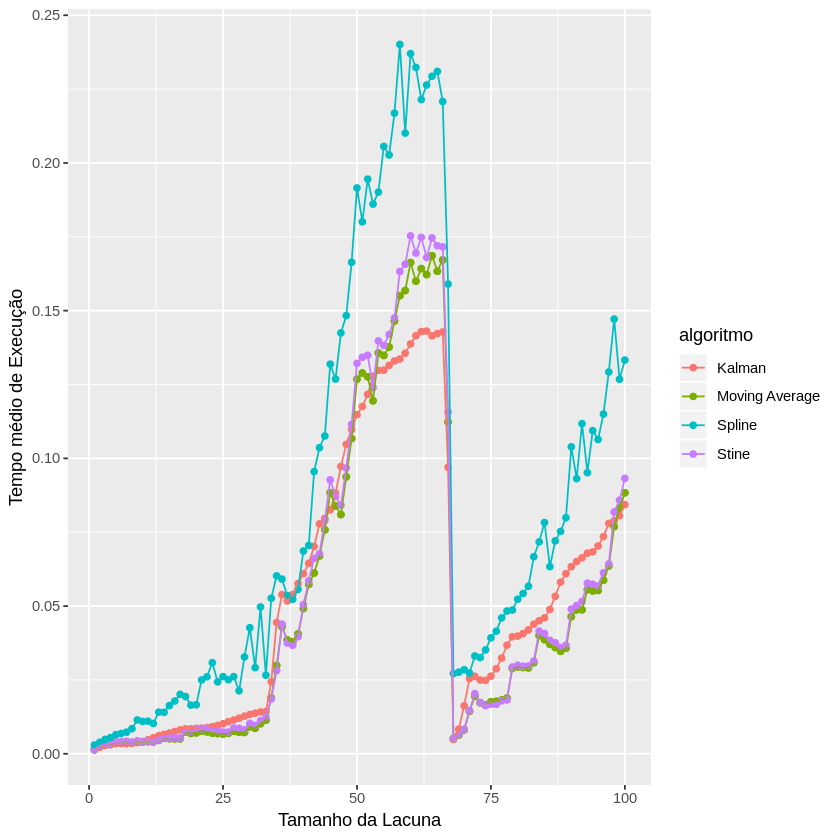

In [27]:
n=100 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200... 30 de tamanho 4200
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
 #   geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11, position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")


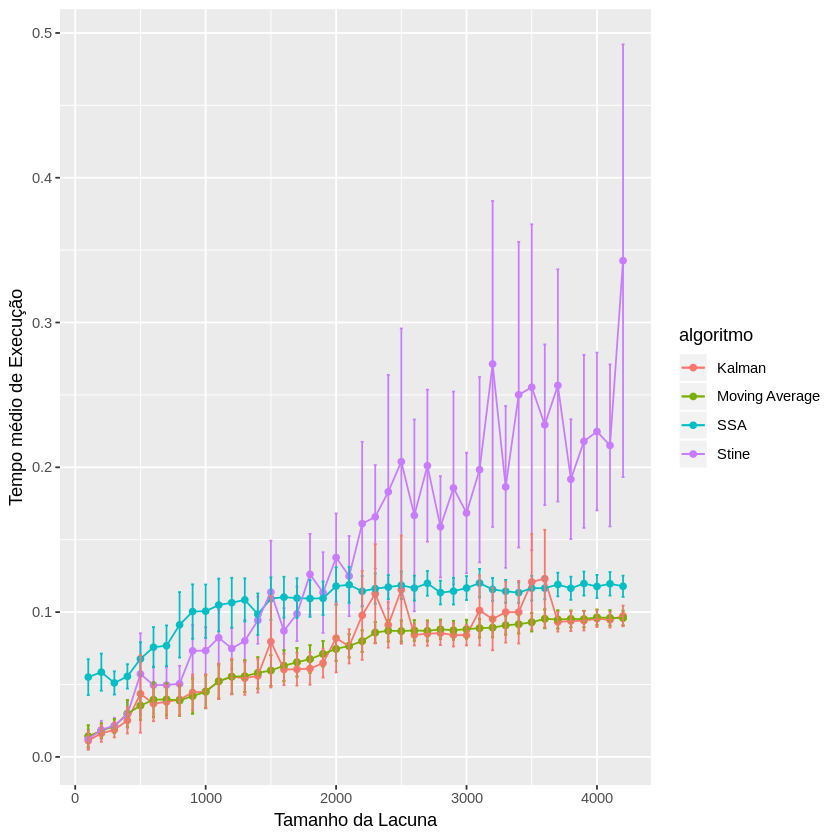

In [13]:

ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


In [ ]:

ggplot(todos[which( todos$tamanho<=2000 & (todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" )),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


In [ ]:
todos